Scraping Data from a Real Webiste +Pandas

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url ='https://en.wikipedia.org/wiki/COVID-19_pandemic_death_rates_by_country'

page =requests.get(url)

soup = BeautifulSoup(page.text,'html')

In [3]:
table = soup.find('table',{'class':"wikitable"})

In [4]:
df=pd.read_html(str(table))
# convert list to dataframe
df=pd.DataFrame(df[0])
df

,Country,Deaths / million,Deaths,Cases
0,World[a],882,7037007,774834237
1,Peru,6485,220831,4524748
2,Bulgaria,5704,38691,1328885
3,Bosnia and Herzegovina,5067,16386,403601
4,Hungary,4920,49046,2230202
...,...,...,...,...
235,Turkmenistan,—,0,0
236,Vatican City,—,0,26
237,Tokelau,—,0,80
238,"Saint Helena, Ascension and Tristan da Cunha",—,—,2166


In [5]:
# drop the unwanted rows
data = df.drop(df.index[[0,239]])

data

,Country,Deaths / million,Deaths,Cases
1,Peru,6485,220831,4524748
2,Bulgaria,5704,38691,1328885
3,Bosnia and Herzegovina,5067,16386,403601
4,Hungary,4920,49046,2230202
5,North Macedonia,4764,9975,350555
...,...,...,...,...
234,Niue,—,—,993
235,Turkmenistan,—,0,0
236,Vatican City,—,0,26
237,Tokelau,—,0,80


In [13]:
data.replace('—', np.nan, inplace=True)
# Assuming 'data' is your DataFrame
data['Deaths'] = pd.to_numeric(data['Deaths'], errors='coerce')
data

,Country,Deaths / million,Deaths,Cases
1,Peru,6485,220831.0,4524748
2,Bulgaria,5704,38691.0,1328885
3,Bosnia and Herzegovina,5067,16386.0,403601
4,Hungary,4920,49046.0,2230202
5,North Macedonia,4764,9975.0,350555
...,...,...,...,...
234,Niue,NaN,NaN,993
235,Turkmenistan,NaN,0.0,0
236,Vatican City,NaN,0.0,26
237,Tokelau,NaN,0.0,80


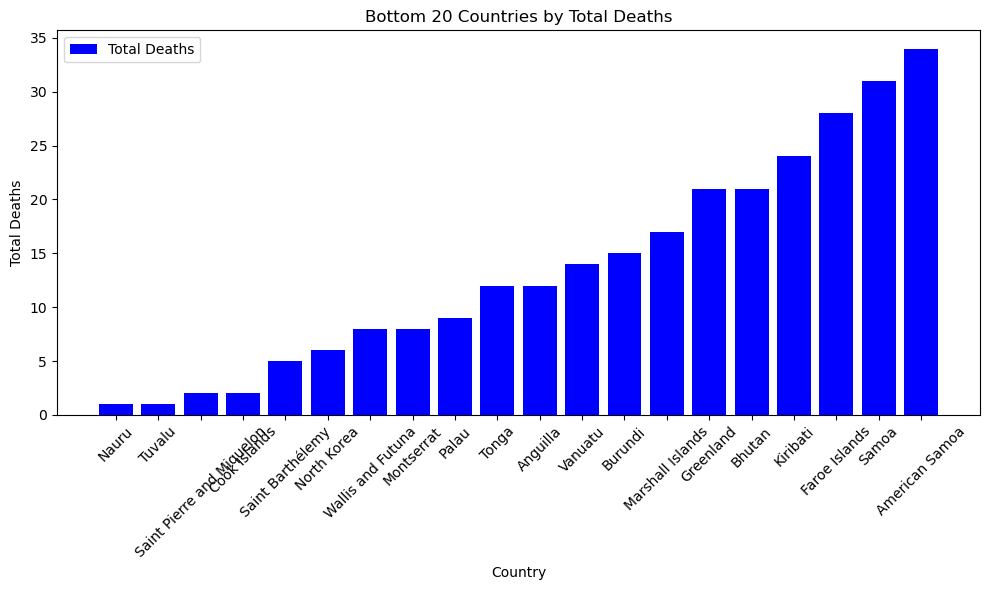

In [18]:
import numpy as np

data_bottom = data.sort_values(by='Deaths',ascending =True)
# Replace 0 with NaN in the "Deaths" column
data_bottom['Deaths'].replace(0, np.nan, inplace=True)

# Drop rows with NaN values in the "Deaths" column
data_bottom.dropna(subset=['Deaths'], inplace=True)

# Plotting the comparison for bottom 20 countries
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(data_bottom["Country"][:20], data_bottom["Deaths"][:20], label='Total Deaths', color='blue')  # Plot total deaths

plt.legend()  # Show legend
plt.xlabel('Country')  # X-axis label
plt.ylabel('Total Deaths')  # Y-axis label
plt.title('Bottom 20 Countries by Total Deaths')  # Plot title
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot


In [20]:
data_bottom

,Country,Deaths / million,Deaths,Cases
18,United States,3488,1180025.0,103436829
22,Brazil,3260,702116.0,37519960
153,India,376,533495.0,45030212
32,Russia,2779,402232.0,23983621
38,Mexico,2627,334958.0,7702809
...,...,...,...,...
196,Nauru,78,1.0,5393
193,Tuvalu,88,1.0,2943
235,Turkmenistan,NaN,0.0,0
236,Vatican City,NaN,0.0,26


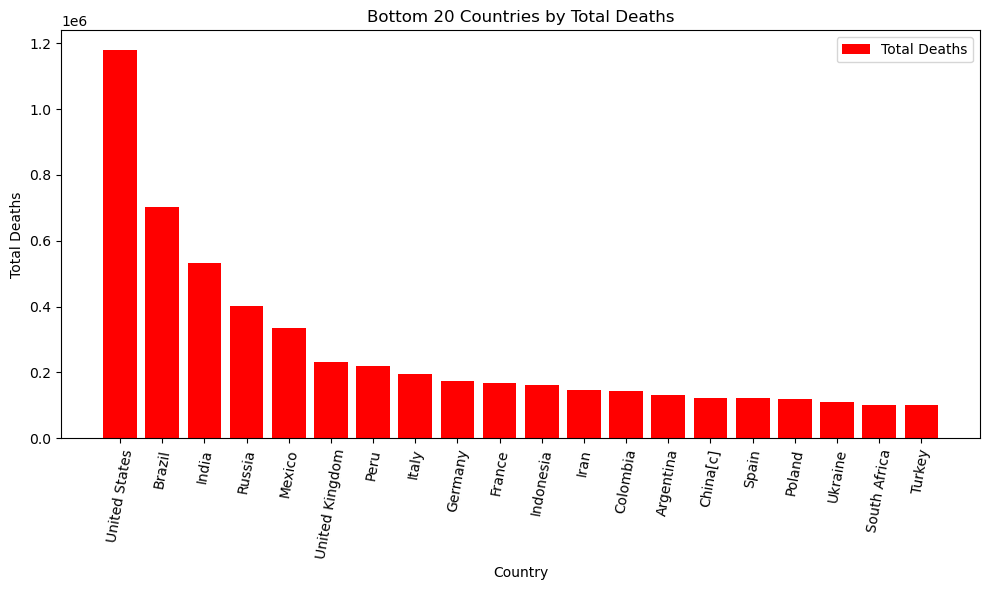

In [25]:
#20 countries with highest number of deaths
data = data[data['Country'] != 'European Union[b]']
# Drop rows with NaN values in the "Deaths" column
data_bottom.dropna(subset=['Deaths'], inplace=True)

# Plotting the comparison for bottom 20 countries
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(data_bottom["Country"][:20], data_bottom["Deaths"][:20], label='Total Deaths', color='red')  # Plot total deaths

plt.legend()  # Show legend
plt.xlabel('Country')  # X-axis label
plt.ylabel('Total Deaths')  # Y-axis label
plt.title('Bottom 20 Countries by Total Deaths')  # Plot title
plt.xticks(rotation=80)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot